In [110]:
import os
import sys
src_path = sys.path[0].replace("paper_working", "src")
# data_path = sys.path[0].replace("notebooks", "data")
if src_path not in sys.path:
    sys.path.append(src_path)

out_path = sys.path[0].replace("paper_working", "output")

import warnings
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

rc_={
    "figure.dpi":300,
    "font.size":10,
    "axes.facecolor":"white",
    "savefig.facecolor":"white",
    "text.usetex":False,
    "legend.frameon":False
}
plt.rcParams.update(rc_)


from plot_helper import *

from utils.plot_utils import *
customize_plt() # customize plt configs, see plot_utils

In [111]:
# get the predictions and calculate the errors

methods=['DeepAR_optuna','LR_NAIVE','LR_PCo','TFT_optuna','XGB']
df=pd.read_csv(r'L:\Coding_project\Energy_grid_new\data\UCSD_raw_data\BLD_Sum.csv',index_col=0)
df.index=pd.to_datetime(df.index)
df_pred=df[pd.Timestamp(2019,1,1,0,0):pd.Timestamp(2019,12,31,23,45)]

for method in methods:
    fn=os.path.join('L:\Coding_project\Energy_grid_new\data\load_forecast',method,'BLD_Sum.csv')
    df=pd.read_csv(fn,index_col=0)
    df.index=pd.to_datetime(df.index)
    df.rename(columns={'RealPower':method},inplace=True)
    try:
        df_pred=pd.merge(df_pred,df,on='DateTime')
    except:
        ...
    
df_error=df_pred.drop(columns=['RealPower_before_scaling'])   
for key in methods:
    df_error[key]=df_error[key]-df_error['RealPower']

In [112]:
for scale in [0.04,0.05,0.06,0.07,0.1,0.02,0.03,0.08]:
    noises = np.random.uniform(low=-1, high=1, size=len(df_pred))
    absolute_average = np.mean(np.abs(noises))
    adjustment_factor = scale / absolute_average
    noises=noises*adjustment_factor
    df_error['noise_{}'.format(str(scale))]=df_error['RealPower']*noises

In [113]:
df_error=df_error.dropna(axis=0)

In [114]:
columns=['DeepAR_optuna', 'LR_NAIVE', 'LR_PCo', 'TFT_optuna', 'XGB',
       'noise_0.04', 'noise_0.05', 'noise_0.06', 'noise_0.07', 'noise_0.1',
       'noise_0.02', 'noise_0.03', 'noise_0.08']

In [115]:
for c in columns:
    df_error[c]=df_error[c]/df_error['RealPower']*100

In [116]:
df_error.replace([np.inf, -np.inf], np.nan, inplace=True)
df_error.dropna(axis=0)

,RealPower,DeepAR_optuna,LR_NAIVE,LR_PCo,TFT_optuna,XGB,noise_0.04,noise_0.05,noise_0.06,noise_0.07,noise_0.1,noise_0.02,noise_0.03,noise_0.08
DateTime,,,,,,,,,,,,,,
2019-01-01 00:00:00,52.3299,-2.954344,3.074556,3.682503,11.021434,-3.249389,-4.411693,-3.467823,-4.089587,-2.277531,6.708286,-2.657880,3.923700,6.381863
2019-01-01 00:15:00,51.4773,-2.737084,3.449156,2.862150,9.984543,-1.646943,6.175667,-8.507051,8.009804,1.261086,-10.405821,2.175522,-2.307964,13.907771
2019-01-01 00:30:00,51.2424,-2.966541,3.663511,3.452301,5.837382,-0.449363,-2.903830,-5.135790,1.538540,-1.847569,-10.348211,3.731152,1.428131,-1.468219
2019-01-01 00:45:00,50.9020,-2.849282,3.980152,2.653215,7.219409,-0.409587,-0.485780,9.939452,4.283747,10.518626,-13.003116,3.414976,-5.251219,0.607166
2019-01-01 01:00:00,51.7313,-5.116126,2.272080,0.448371,5.928133,-2.848507,-7.571987,-7.178808,-10.627916,3.223674,-0.709649,-1.372852,-5.940275,13.037582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 22:45:00,48.4871,5.535527,7.541783,7.315456,28.949691,4.493064,-3.761426,7.299762,-10.924896,-11.699455,6.627685,1.546501,2.820072,-2.161543
2019-12-31 23:00:00,48.3798,2.040023,6.839474,6.001598,20.012127,1.679788,4.304599,5.603669,-7.980991,-8.865151,8.349228,-1.882173,1.875448,10.479877
2019-12-31 23:15:00,47.2761,1.516123,7.245312,5.389626,17.114576,1.600826,4.493281,0.752522,4.201169,9.007496,-11.713463,1.618211,3.462612,7.113574


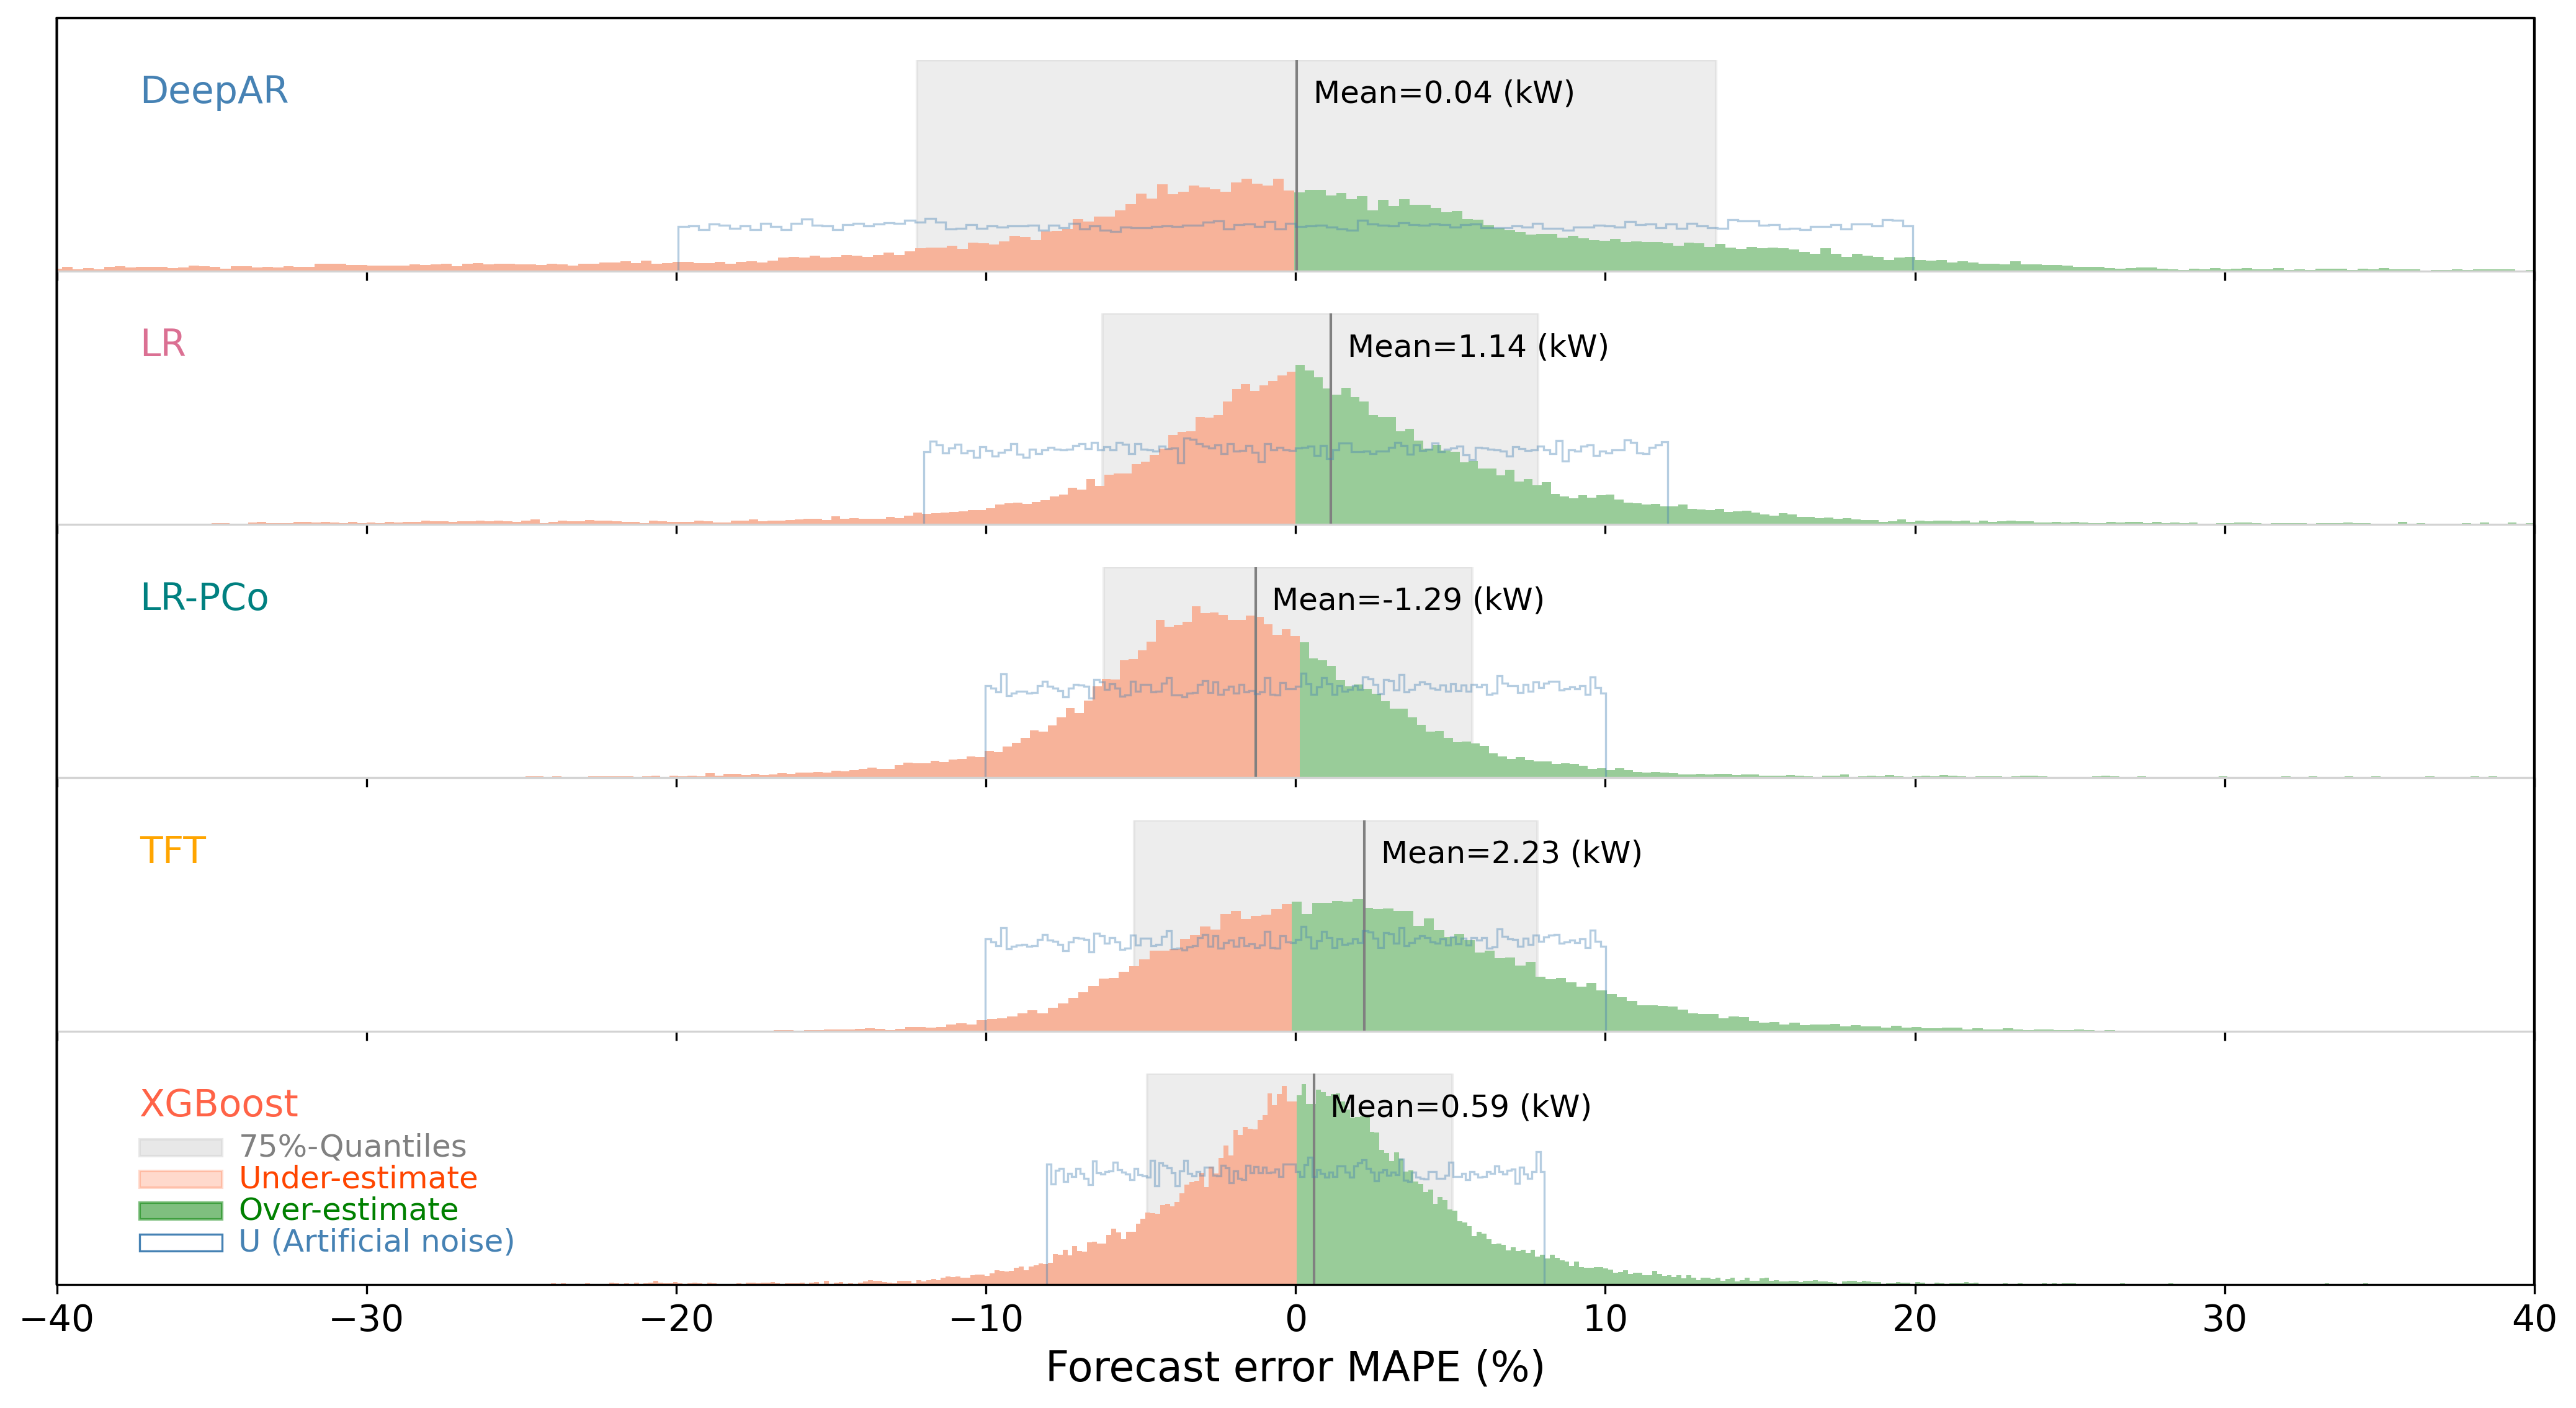

In [117]:
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
import scipy
from matplotlib.patches import ConnectionPatch
def get_quantile(values,pos,quantile):
    #print(values)
    if pos:
        index=int(len(values)*quantile)
        values=np.sort(values)
        #print(values)
        return values[index]
    else:
        index=int(len(values)*(1-quantile))
        values=np.sort(values)
        return values[index]
def plot_stacked_hist(df_error,keys,labels,xlim=[-25,25],figsize=(14,10),quantile=0.75,draw_ref=False,ref_dic=None):
    n=len(keys)
    fig,axs=plt.subplots(n,1,figsize=figsize,sharex=True,sharey=True)
    k=0
    
    #xlim=[-25,25]
    for key in keys:
        counts, edges, patches = axs[k].hist(np.array(df_error[key]),bins=500,label=key,linewidth=0,density=True)
        mae=np.nanmean(abs(np.array(df_error[key])))
        mean=np.nanmean(np.array(df_error[key]))
        pos_quant=get_quantile(list(df_error[df_error[key]>0][key]),True,quantile)
        neg_quant=get_quantile(list(df_error[df_error[key]<0][key]),False,quantile)
        #axs[k].axvline(mae,0,1,color='steelblue',linewidth=0.5)
        axs[k].axvline(mean,0,1,color='gray',linewidth=1)
        axs[k].axvspan(neg_quant,pos_quant,0,1,alpha=0.4,color='lightgray',zorder=-100)
        '''samples=np.array(df_error[df_error[key]>-25][key])+25
        shape, loc, scale = scipy.stats.lognorm.fit(samples, floc=0)
        centers = 0.5*(edges[:-1] + edges[1:])
        cdf = scipy.stats.lognorm.cdf(edges, shape, loc=loc, scale=scale)
        prob = np.diff(cdf)
        axs[k].plot(centers-25,samples.size*prob, 'k-', linewidth=2, label='Expected histogram')'''
        trans = transforms.blended_transform_factory(
            axs[k].transData, axs[k].transAxes)
        
        scale=15/xlim[1]
        
        if draw_ref:
            n1, bins1, patches1 = axs[k].hist(np.array(df_error[ref_dic[key]]),bins=120,label=key,alpha=0.4,
                                              edgecolor="steelblue",histtype="step",linewidth=0.8,density=True)
            #axs[k].plot(bins1[:-1],n1,'-',linewidth=0.5)
        
        for bar in axs[k].containers[0]:
            # get x midpoint of bar
            x = bar.get_x() + 0.5 * bar.get_width()
            # set bar color based on x
            if x < 0:
                bar.set_color('#F7B39A')
                #bar.set_alpha(0.4)
            else:
                bar.set_color('#99CC99')
                #bar.set_alpha(0.4)

        if round(len(keys)/(k+1))==2:
            #axs[k].set_ylabel("Density")
            ...
        
        if k<len(keys)-1:
            axs[k].spines['right'].set_color('none')
            axs[k].spines['left'].set_color('none')
            axs[k].spines['top'].set_color('none')
            axs[k].spines['bottom'].set_color('lightgray')
            axs[k].set_yticklabels([])
            axs[k].set_yticks([])
            #axs[k].set_xticks([])
        else:
            axs[k].spines['right'].set_color('none')
            axs[k].spines['left'].set_color('none')
            axs[k].spines['top'].set_color('none')
            #axs[k].spines['bottom'].set_color('none')
            axs[k].set_yticklabels([])
            axs[k].set_yticks([])
            #axs[k].set_xticks([])
            
            # plot legend
            
            axs[k].axvspan(-14/scale,-13/scale,0.61,0.69,alpha=0.5,color='lightgray')
            axs[k].text(-12.8/scale,0.61,'{}%-Quantiles'.format(str(int(quantile*100))),color='gray',transform=trans,zorder=100)
            axs[k].axvspan(-14/scale,-13/scale,0.46,0.54,alpha=0.2,color='orangered')
            axs[k].text(-12.8/scale,0.46,'Under-estimate'.format(str(round(quantile,2))),color='orangered',transform=trans)
            axs[k].axvspan(-14/scale,-13/scale,0.31,0.39,alpha=0.5,color='green')
            axs[k].text(-12.8/scale,0.31,'Over-estimate'.format(str(round(quantile,2))),color='green',transform=trans)
            if draw_ref:
                axs[k].axvspan(-14/scale,-13/scale,0.16,0.24,alpha=1,facecolor='w',edgecolor='steelblue',linewidth=0.8)
                axs[k].text(-12.8/scale,0.16,'U (Artificial noise)'.format(str(round(quantile,2))),color='steelblue',transform=trans)
                
            axs[k].set_xlabel('Forecast error MAPE (%)')
            
        axs[k].set_xlim(xlim)
        #axs[k].set_ylim(ylim)
        axs[k].text(-14/scale,0.8,labels[key],transform=trans,color=color_dic_glb[key],fontsize=label_fs*1.2) 
        #axs[k].text(mae+0.2,0.55,'MAE={} (kW)'.format(str(round(mae,2))),color='steelblue',transform=trans)
        axs[k].text(mean+0.2/scale,0.8,'Mean={} (kW)'.format(str(round(mean,2))),color='black',transform=trans)

        
        k+=1
    
    

    con = ConnectionPatch(xyA=(0,0), xyB=(0,1.2), coordsA="axes fraction", coordsB="axes fraction",axesA=axs[n-1], axesB=axs[0], 
                          color="black",linewidth=1)
    axs[n-1].add_artist(con)
    
    con = ConnectionPatch(xyA=(1,0), xyB=(1,1.2), coordsA="axes fraction", coordsB="axes fraction",axesA=axs[n-1], axesB=axs[0], 
                          color="black",linewidth=1)
    axs[n-1].add_artist(con)
    
    con = ConnectionPatch(xyA=(0,1.2), xyB=(1,1.2), coordsA="axes fraction", coordsB="axes fraction",axesA=axs[0], axesB=axs[0], 
                          color="black",linewidth=1)
    axs[0].add_artist(con)
    #ax2.add_artist(con)
    fig.tight_layout()
    

labels={
    'DeepAR_optuna':'DeepAR',
    'LR_NAIVE':'LR',
    'LR_PCo':'LR-PCo',
    'TFT_optuna':'TFT',
    'XGB':'XGBoost'
}
ref_dic={
    'DeepAR_optuna':'noise_0.1',
    'LR_NAIVE':'noise_0.06',
    'LR_PCo':'noise_0.05',
    'TFT_optuna':'noise_0.05',
    'XGB':'noise_0.04'
}
plot_stacked_hist(df_error,methods,labels,[-40,40],(14,1.5*5),draw_ref=True,ref_dic=ref_dic)

In [118]:
heuristic_df=pd.read_csv(r'L:\Coding_project\Energy_grid_new_exp_local\BLD_simple_grid_search\BLD_sum_Simple_prediction_K96_4weeks_0.1.csv',index_col=0)
steps=['E_1','E_48','E_96']
labels={
    'E_1':'K=1 (15min)',
    'E_2':'K=2',
    'E_3':'K=3',
    'E_4':'K=4',
    'E_48':'K=48 (12h)',
    'E_96':'K=96 (24h)',
}
ref_dic={
    'E_1':'noise_0.02',
    'E_4':'noise_0.04',
    'E_48':'noise_0.07',
    'E_96':'noise_0.08',
}
heuristic_df.index=pd.to_datetime(heuristic_df.index)
heuristic_df=pd.merge(heuristic_df,df_error,left_index=True,right_index=True,how='inner')

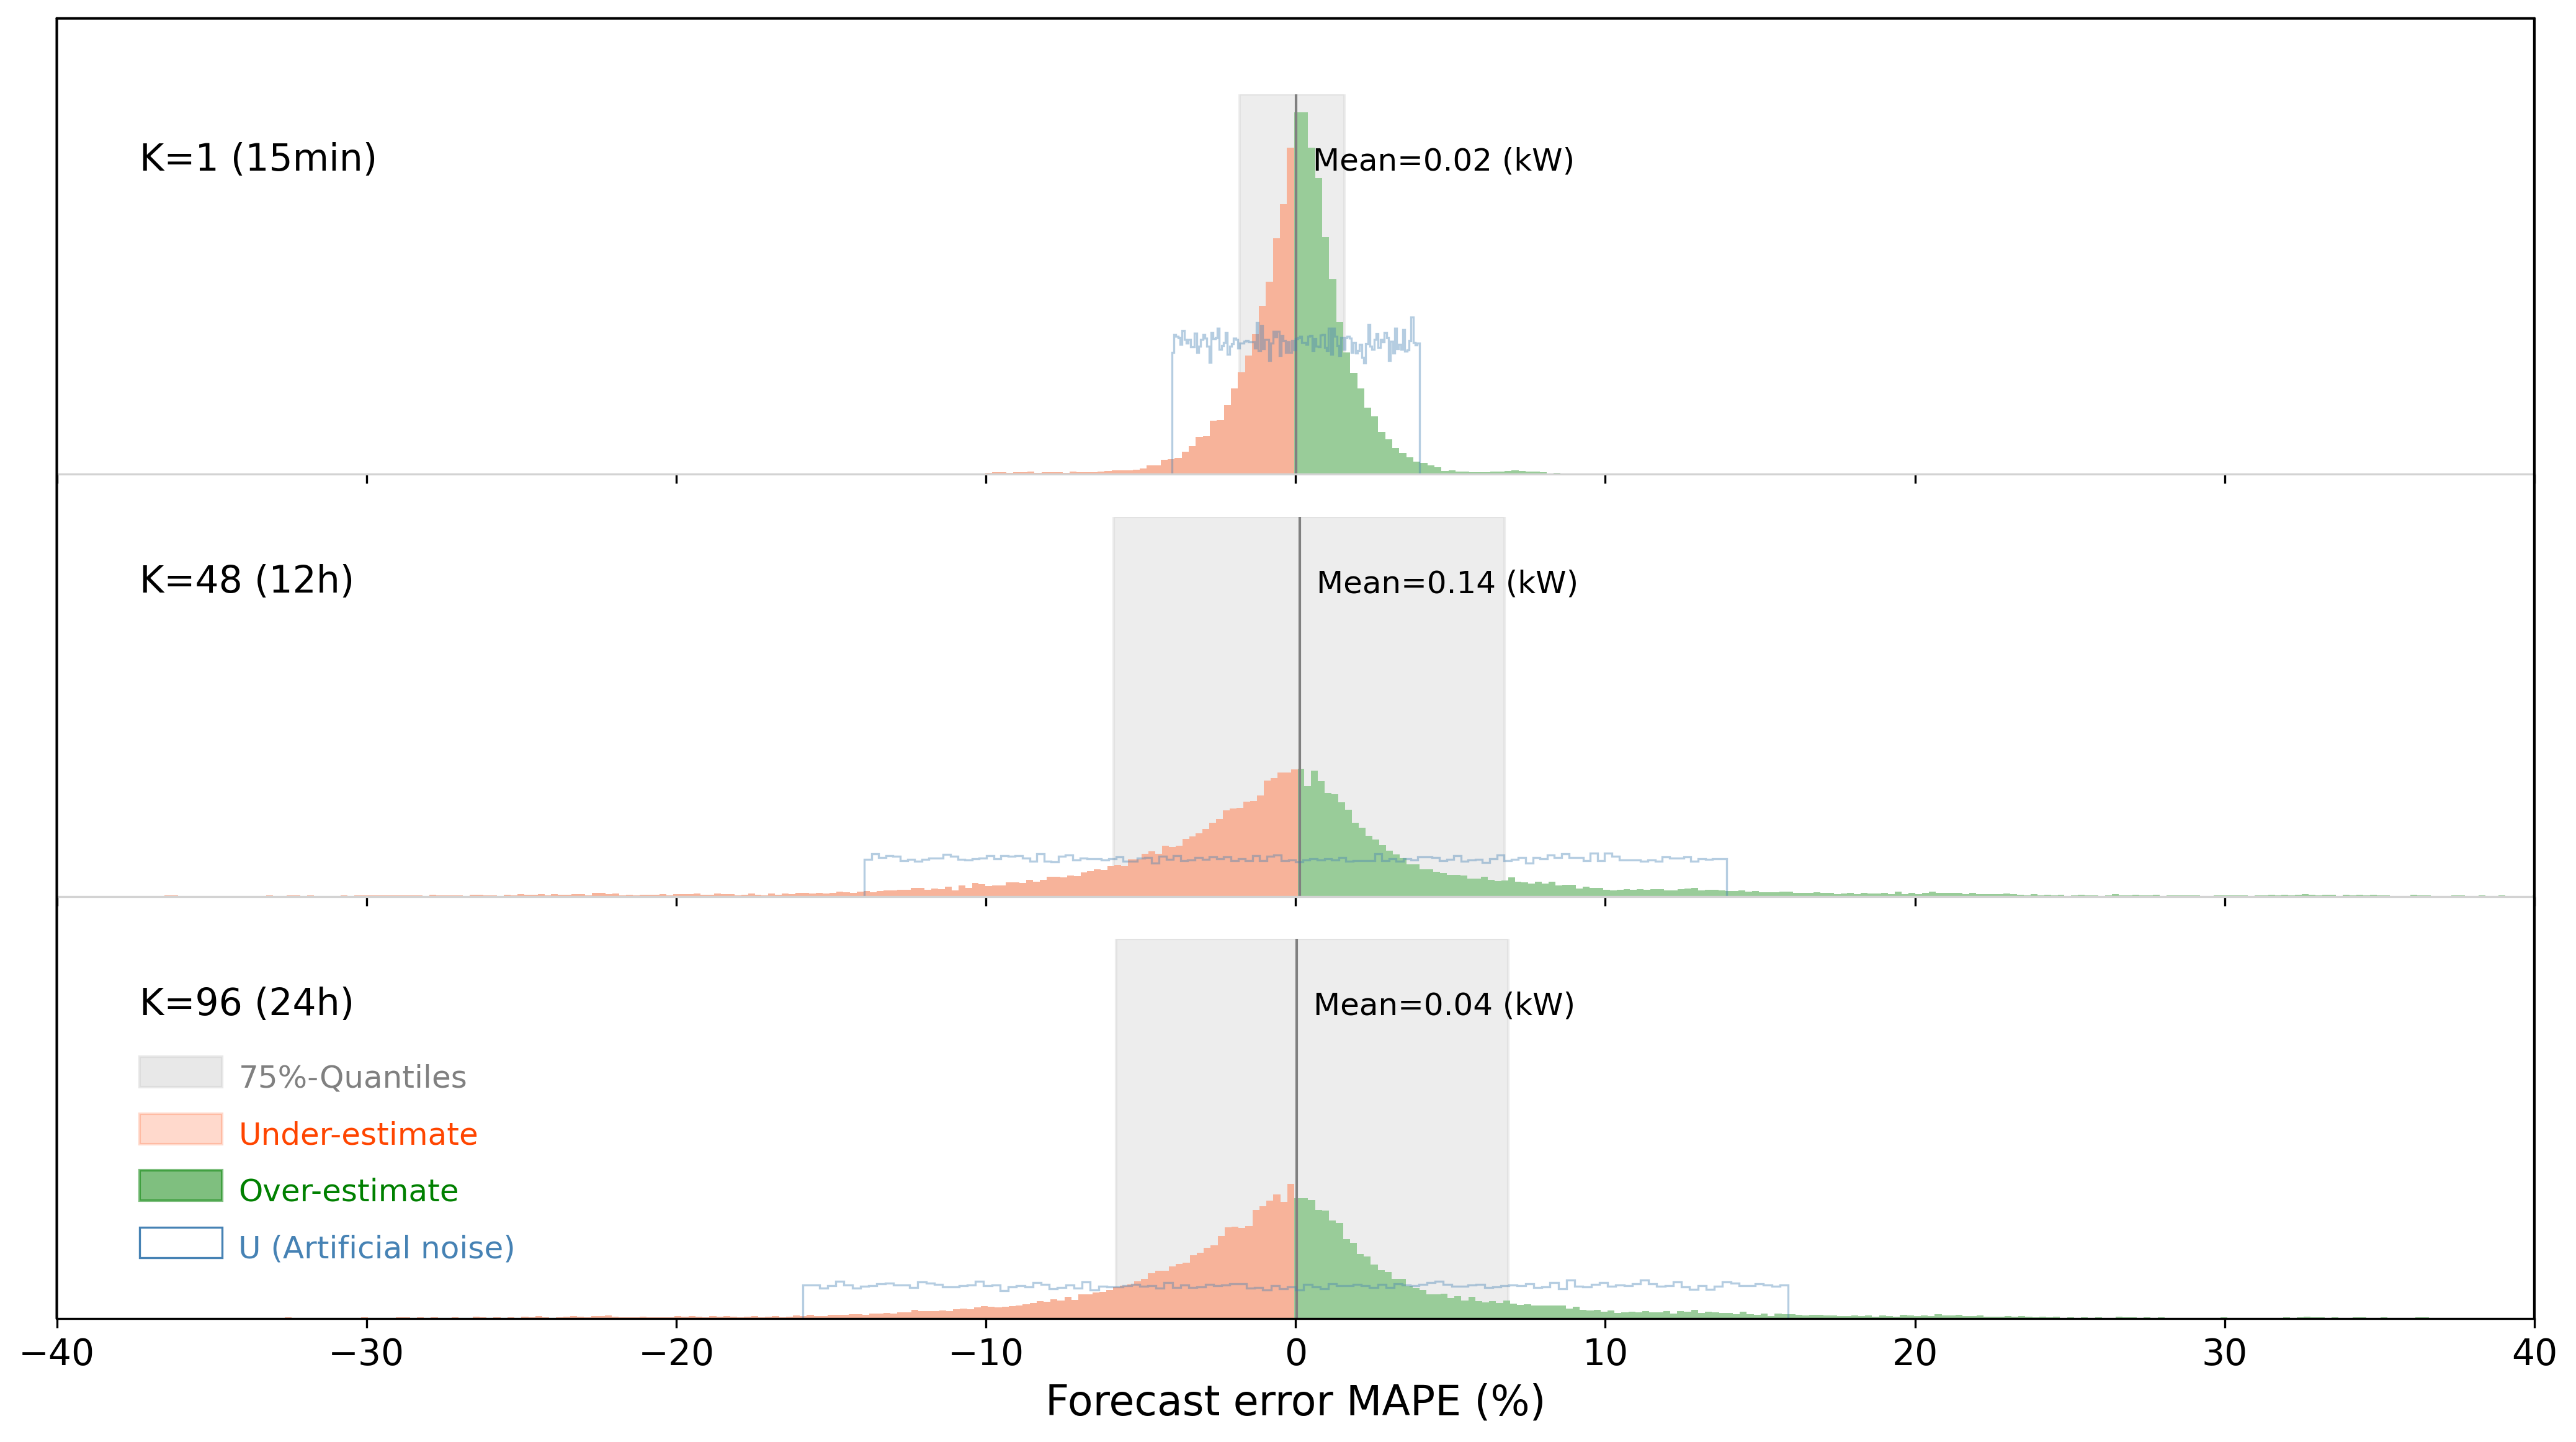

In [119]:
plot_stacked_hist(heuristic_df,steps,labels,[-40,40],(14,1.5*5),draw_ref=True,ref_dic=ref_dic)